`[1] Dibawah ini terdapat command apt-get update yang digunakan untuk mengupdate list dari package yang perlu diupgrade. Command ini akan mengupdate list tersebut untuk mendapatkan informasi untuk versi terbaru dari package tersebut beserta dependensinya. [2] Setelah itu akan menginstall jdk dan dimasukkan ke dalam folder /dev/null dengan menggunakan command apt-get install [3] Lalu kita akan mendownload  apache spark melalui url yang sudah disediakan oleh apache spark dengan menggunakan wget, versi spark yang kita download kali ini adalah 3.2.2. [4] Jika sudah terdownload, maka selanjutnya kita akan mengekstrak file apache spark tersebut dengan menggunakan command tar xf lalu memanggil nama folder hasil download tadi. [5] Dan terakhir, kita akan menginstall findspark dengan menggunakan pip, untuk -q disini berarti suatu option untuk mengurangi output yang dihasilkan dari pip. Gunanya findspark adalah untuk membuat pyspark yang kita miliki menjadi library biasa yang bisa dipanggil saat runtime`








In [ ]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.2.2/spark-3.2.2-bin-hadoop3.2.tgz
!tar xf spark-3.2.2-bin-hadoop3.2.tgz
!pip install -q findspark

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:9 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,493 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:12 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [995 kB]
Get:13 http://arch

`Lalu kita melakukan import os untuk menggunakan functionalitas dari os yang sedang dijalankan. Setelah itu akan diedit environmentnya. Yang pertama adalah konfigurasi environment untuk JDK yang bernama JAVA_HOME yang valuenya mengarah ke file jdk yang sudah diinstall sebelumnnya. Lalu membuat konfigurasi environment untuk spark yang bernama SPARK_HOME yang dimana value nya mengarahkan ke file spark yang sudah diinstall tadi` 




In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.2-bin-hadoop3.2"

`Setelah kita melakukan konfigurasi pada environment os, selanjutnya adalah melakukan inisiasi spark. Namun agar bisa memanggil findspark, kita harus mengimport findspark terlebih dahulu. findspark.init() akan membuat pyspark bisa diimport sebagai library biasa, ini adalah tahap dari inisiasi spark agar kita bisa menggunakan librarynya sewaktu waktu. Lalu sebagai awal dari penggunaan spark, kita harus membuat entry point terlebih dahulu agar kita bisa menggunakan dataframe,dan utilitas lainnya dari spark dengan menggunakan SparkSession. Pertama kita harus mengimportnya terlebih dahulu, untuk membuat spark session, kita bisa menggunakan method builder dan getOrCreate. `



In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

`Untuk bisa mengolah data, kita akan mengupload datanya terlebih dahulu. Disini menggunakan method upload() yang sudah disediakan oleh library files dari google colab`

In [ ]:
from google.colab import files
files.upload()

Saving lx.csv to lx.csv


{'lx.csv': b'learners_name;institute_name;course_title;assignment_title;score;status;submission_date\r\nAudric Kenny Rizally;SMK Negeri 4 Bandung;WR102: Web Development Basic;Tugas Chapter #1: Membangun Halaman Login;;pending;11/02/2023\r\nMuhammad Ariel Valensa Putra;SMK Angkasa Husein Sastranegara Bandung;WR303: Build Your Own Website;Tugas: Homework Minggu #3;;pending;11/02/2023\r\nSYARIFAH AINI;SMA NEGERI 1 PASAMAN;Computational Thinking Diagnostic Test 2023 SMA/SMK;Tugas;;pending;11/02/2023\r\nAnjas Sobirin;SMK Salafiah Kejayan;WR102: Web Development Basic;Tugas Chapter #3: Melengkapi Fitur Postbox!;;pending;11/02/2023\r\nNajiah Qonita Arifin;SD IT Alam Talago;Computational Thinking Diagnostic Test 2023 SD;Tugas ;;pending;11/02/2023\r\nFattah Halim Arifin;SD IT Alam Talago;Computational Thinking Diagnostic Test 2023 SD;Tugas ;;pending;11/02/2023\r\nMuhamad Abdulloh Azzam;SMK Negeri Sukasari;WR102: Web Development Basic;Tugas Chapter #12: Berlatih Menggunakan Pymongo;80;approve;11/

`Melakukan import untuk berbagai macam library. [1] pyspark adalah API python untuk spark, disebut sebagai framework yang bisa memproses data dalam jumah yang besar. Dengan ini, kita bisa menggunakan spark dengan python.[2] pandas adalah library yang kita gunakan dalam melakukan pengolahan data nantinya seperti memanipulasi, transform, membersihkan, dan menganalisis data. [3] Numpy adalah library yang digunakan saat kita akan mengolah data numerik. Lalu dengan numpy kita juga bisa melakukan berbagai macam operasi matematika, seperti aljabar, dan sebagainya. [4] matplotlib adalah library yang digunakan untuk melakukan visualisasi data, ada berbagai macam plot yang bisa kita gunakan dalam memvisualisasikan data. plot-plot ini sudah disediakan dalam library matplotlib. [5] Seaborn adalah lubrary yang juga digunakan untuk melakukan visualisasi data, seaborn ini tingkatannya lebih tinggi dari matplotlib karena kita bisa membuat visualisasi data yang lebih kompleks dengan function yang sudah disediakan.  `

In [ ]:
import pyspark
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

`[1] Membuat variabel baru bernama lx yang digunakan untuk menampung hasil dari pembacaan dataset. Pembacaan dataset dilakukan dengan menggunakan function read.csv sebab file yang sudah diupload tadi dalam bentuk csv. Lalu akan kita panggil dataset yang sudah di upload tadi sebagai argumennya, nama csv saya adalah lx.csv.  InferSchema disini berguna untuk membuat tipe data kolom berdasarkan data secara otomatis sebab disini kita membuatnya True. Lalu option kedua adalah header yang berfungsi untuk membaca baris pertama dari file csv sebagai nama kolom, disini kita juga set sebagai true. Lalu kita beritahu bahwa tanda yang memisahkan setiap data itu adalah tanda titik koma didalam atribut sep. [2]Lalu akan kita cetak sampel datanya dengan menggunakan function show, disini saya memberikan argumen '20' yang berarti akan menampilkan 20 data pertama dari data kita. `

In [ ]:
lx = spark.read.csv('lx.csv',inferSchema=True, header =True, sep=";")
lx.show(20)

+--------------------+--------------------+--------------------+--------------------+-----+-------+---------------+
|       learners_name|      institute_name|        course_title|    assignment_title|score| status|submission_date|
+--------------------+--------------------+--------------------+--------------------+-----+-------+---------------+
|Audric Kenny Rizally|SMK Negeri 4 Bandung|WR102: Web Develo...|Tugas Chapter #1:...| null|pending|     11/02/2023|
|Muhammad Ariel Va...|SMK Angkasa Husei...|WR303: Build Your...|Tugas: Homework M...| null|pending|     11/02/2023|
|       SYARIFAH AINI|SMA NEGERI 1 PASAMAN|Computational Thi...|               Tugas| null|pending|     11/02/2023|
|       Anjas Sobirin|SMK Salafiah Kejayan|WR102: Web Develo...|Tugas Chapter #3:...| null|pending|     11/02/2023|
|Najiah Qonita Arifin|   SD IT Alam Talago|Computational Thi...|              Tugas | null|pending|     11/02/2023|
| Fattah Halim Arifin|   SD IT Alam Talago|Computational Thi...|        

`Pada pyspark, kita juga bisa melihat list dari nama-nama kolom dengan menggunakan function columns. Namun disini kita hanya bisa melihat nama kolomnya saja, tidak dengan tipe datanya.`

In [ ]:
lx.columns

['learners_name',
 'institute_name',
 'course_title',
 'assignment_title',
 'score',
 'status',
 'submission_date']

`Lalu, agar lebih lengkap kita bisa melihat summary dari dataset kita dengan menggunakan function describe yang bisa menampilkan overview tentang tipe data dari lx tadi yaitu DataFrame, dan didalam data frame ini terdapat list dari kolom-kolom yang ada pada lx beserta dengan tipe datanya.`

In [ ]:
lx.describe()

DataFrame[summary: string, learners_name: string, institute_name: string, course_title: string, assignment_title: string, score: string, status: string, submission_date: string]

`Untuk melihat informasi lebih lanjut dari dataset kita, dibawah ini kita akan mencetak skema dari file lx tadi dengan menggunakan method printSchema. Skema ini digunakan untuk melihat struktur dari dataset kita, disini kita bisa lihat ada root serta child yang ada didalamnya yang merupakan daftar kolom-kolom, lengkap dengan tipe datanya serta settingan tambahan lainnya yaitu apakah dia nullable (bisa null) dan nilainya adalah true, yang berarti ada kemungkinan data kita mengandung null karena settingannya nullable. Dengan melihat skema ini, kita bisa memastikan apakah data sudah terbaca dengan benar sesuai yang diinginkan.`

In [ ]:
lx.printSchema()

root
 |-- learners_name: string (nullable = true)
 |-- institute_name: string (nullable = true)
 |-- course_title: string (nullable = true)
 |-- assignment_title: string (nullable = true)
 |-- score: integer (nullable = true)
 |-- status: string (nullable = true)
 |-- submission_date: string (nullable = true)



`Karena tadi kita sudah mengimport library pandas. Yang dimana pandas digunakan dalam mengolah data. Disini data frame kita akan di konversi menjadi pandas dengan menggunakan method toPandas(). Pertama kita membuat variabel yang bernama lxpandas, lalu akan kita select semua datanya dengan menggunakan *. Dan terakhir baru di konversikan ke pandas dengan method toPandas`

In [ ]:
lxpandas = lx.select("*").toPandas()

`Lalu setelah itu, untuk melihat sampel data kita yang sudah dikonversikan ke pandas tadi. Bisa dengan menggunakan method head(). Kita tidak bisa lagi menggunakan method show seperti tadi, sebab pandas tidak menyediakan method itu, sehingga akan terjadi error jika kita panggil method show. Method head pada pandas ini akan secara default menampilkan 5 data teratas dari data frame kita. Lalu bisa dilihat perbedaan tampilan antara spark dengan pandas. Untuk pandas tabelnya disini lebih bagus daripada menggunakan spark sebelumnya. `

In [ ]:
lxpandas.head()

learners_name                           institute_name  \
0          Audric Kenny Rizally                     SMK Negeri 4 Bandung   
1  Muhammad Ariel Valensa Putra  SMK Angkasa Husein Sastranegara Bandung   
2                 SYARIFAH AINI                     SMA NEGERI 1 PASAMAN   
3                 Anjas Sobirin                     SMK Salafiah Kejayan   
4          Najiah Qonita Arifin                        SD IT Alam Talago   

                                        course_title  \
0                       WR102: Web Development Basic   
1                      WR303: Build Your Own Website   
2  Computational Thinking Diagnostic Test 2023 SM...   
3                       WR102: Web Development Basic   
4     Computational Thinking Diagnostic Test 2023 SD   

                              assignment_title  score   status submission_date  
0    Tugas Chapter #1: Membangun Halaman Login    NaN  pending      11/02/2023  
1                    Tugas: Homework Minggu #3    NaN  pending      11/02/2023  
2                                        Tugas    NaN  pending      11/02/2023  
3  Tugas Chapter #3: Melengkapi Fitur Postbox!    NaN  pending      11/02/2023  
4                                       Tugas     NaN  pending      11/02/2023

`Kita bisa melihat struktur dari data kita yaitu kolom-kolom yang ada pada dataset kita dengan menggunakan dtypes. Disini akan ditampilkan nama-nama kolom yang ada pada dataframe dan juga tipe datanya. Kita bisa lihat bahwa tipe data nya sekarang sudah berganti. Yang sebelumnya terdiri dari string dan integer. Sekarang string berubah menjadi tipe data object, lalu score berubah tipe datanya menjadi float64. Namun object pada pandas adalah sebuah tipe data text, sama seperti string. Pandas tidak memiliki tipe data string adalah karena dibuat berbasis numpy. Karena numpy dibuat untuk bekerja dengan array data yang memiliki tipe data sama yang tujuannya adalah agar penggunaan memori bisa teroptimasi dan performa kerja numpy juga akan lebih bagus. Sehingga, pandas akan menggunakan tipe data object untuk menyimpan strings. Sehingga akan lebih kompatibel dengan tipe data yang lain. `

In [ ]:
lxpandas.dtypes

learners_name        object
institute_name       object
course_title         object
assignment_title     object
score               float64
status               object
submission_date      object
dtype: object

`Selanjutnya, saya menggunakan method info(). Dengan method info ini, saya bisa mendapatkan info lebih lanjut mengenai dataframe saya. Disini kita bisa melihat range index, lalu bisa melihat list kolom, jumlah data dari masing-masing kolom dan terakhir tipe data dari masing-masing kolom. Serta, kita juga bisa melihat sebanyak apa memori yang digunakan.`

In [ ]:
lxpandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39617 entries, 0 to 39616
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   learners_name     39617 non-null  object 
 1   institute_name    39617 non-null  object 
 2   course_title      39615 non-null  object 
 3   assignment_title  39615 non-null  object 
 4   score             31549 non-null  float64
 5   status            39617 non-null  object 
 6   submission_date   33503 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.1+ MB


`Selanjutnya disini karena saya memiliki kolom date/tanggal, namun tipe datanya masih object. Sehingga saya akan mengubah tipe datanya menjadi date dengan menggunakan function to_datetime(). Disini kita akan memanggil kolom submission_date. Lalu setelah itu akan kita ganti formatnya menjadi d-m-y. Agar tampak lebih bagus.`

In [ ]:
lxpandas["submission_date"] =  pd.to_datetime(lxpandas["submission_date"], format="%d/%m/%Y")

`Jika sudah selesai mengganti tipe data, selanjutnya akan kita cek kembali tipe data masing-masing kolom dengan menggunakan dtypes. Pada outputnya, disini kita bisa melihat bahwa tipe data dari kolom submission_date sudah berganti menjadi datetime64.`

In [ ]:
lxpandas.dtypes

learners_name               object
institute_name              object
course_title                object
assignment_title            object
score                      float64
status                      object
submission_date     datetime64[ns]
dtype: object

`Selanjutnya, karena tipe datanya sudah berhasil terganti. Maka akan dicek apakah format date nya sudah sesuai dengan yang kita tetapkan saat pengubahan tipe data tadi. Seperti yang sudah disebutkan diatas, untuk menampilkan data dari pandas, kita menggunakan method head. Namun disini saya tidak hanya ingin menampilkan 5 data (default), melainkan menampilkan 10 data. Caranya ada dengan memasukkan angka 10 sebagai argumen dari method head().`

In [ ]:
lxpandas.head(10)

learners_name                           institute_name  \
0          Audric Kenny Rizally                     SMK Negeri 4 Bandung   
1  Muhammad Ariel Valensa Putra  SMK Angkasa Husein Sastranegara Bandung   
2                 SYARIFAH AINI                     SMA NEGERI 1 PASAMAN   
3                 Anjas Sobirin                     SMK Salafiah Kejayan   
4          Najiah Qonita Arifin                        SD IT Alam Talago   
5           Fattah Halim Arifin                        SD IT Alam Talago   
6        Muhamad Abdulloh Azzam                      SMK Negeri Sukasari   
7                 Dimas Priyadi                     SMK Salafiah Kejayan   
8        Danudenta Arhab Tsaqif                       SMK Negeri 7 Batam   
9                Siti Rahmawati  SMK Angkasa Husein Sastranegara Bandung   

                                        course_title  \
0                       WR102: Web Development Basic   
1                      WR303: Build Your Own Website   
2  Computational Thinking Diagnostic Test 2023 SM...   
3                       WR102: Web Development Basic   
4     Computational Thinking Diagnostic Test 2023 SD   
5     Computational Thinking Diagnostic Test 2023 SD   
6                       WR102: Web Development Basic   
7                       WR102: Web Development Basic   
8                       WR102: Web Development Basic   
9                      WR303: Build Your Own Website   

                                    assignment_title  score   status  \
0          Tugas Chapter #1: Membangun Halaman Login    NaN  pending   
1                          Tugas: Homework Minggu #3    NaN  pending   
2                                              Tugas    NaN  pending   
3        Tugas Chapter #3: Melengkapi Fitur Postbox!    NaN  pending   
4                                             Tugas     NaN  pending   
5                                             Tugas     NaN  pending   
6    Tugas Chapter #12: Berlatih Menggunakan Pymongo   80.0  approve   
7        Tugas Chapter #3: Melengkapi Fitur Postbox!    NaN   reject   
8  Tugas Chapter #8: Fan Book dengan API Weather ...  100.0  approve   
9                          Tugas: Homework Minggu #3    NaN  pending   

  submission_date  
0      2023-02-11  
1      2023-02-11  
2      2023-02-11  
3      2023-02-11  
4      2023-02-11  
5      2023-02-11  
6      2023-02-11  
7      2023-02-11  
8      2023-02-11  
9      2023-02-11

`Tadi kita sudah bisa melihat list kolom, lalu juga dengan tipe datanya. Selanjutnya kita akan melihat jumlah dari dataset kita secara keseluruhan. Kita bisa melihatnya dengan menggunakan method shape. Disini method shape akan menampilkan jumlah (baris, kolom) dari dataset kita. Bisa dilihat disini, dataset saya memiliki 39617 baris dan memiliki 7 kolom.`

In [ ]:
lxpandas.shape

(39617, 7)

`Lalu kita akan melakukan data preparation. Pertama, saya akan mengecek apakah ada missing value atau ada data null dari masing-masing kolom. Caranya adalah kita menggunakan method isnull(). Lalu setelah itu akan dihitung jumlah null nya dengan menggunakan method sum(). Disini bisa dilihat bahwa pada course_title, terdapat 2 buah data yang null, lalu pada assignment_title juga terdapat 2 buah data yang null, setelah itu pada score terdapat 8068 data yang kosong dan terakhir untuk submission_date terdapat 6114 data yang kosong.`

In [ ]:
lxpandas.isnull().sum()

learners_name          0
institute_name         0
course_title           2
assignment_title       2
score               8068
status                 0
submission_date     6114
dtype: int64

`Untuk lebih jelasnya, disini saya mencoba menampilkan lebih detail lagi tentang jumlah data yang ada pada score (selain yang bernilai null) dengan count(). Lalu menjumlahkan berapa baris yang memiliki nilai null pada score dengan menggunakan method isnull() dan sum(). Terakhir akan dicetak dengan menggunakan print. Disini pada outputnya bisa dilihat bahwa total data score itu adalah 31549 dan total data yang kosong itu berjumlah 8068. `

In [ ]:
total = lxpandas['score'].count()
scorenan = lxpandas['score'].isnull().sum()
print("Total Score Data : ",total)
print("Total Score NaN : ",scorenan)

Total Score Data :  31549
Total Score NaN :  8068


`Setelah itu untuk melihat lebih jelas lagi, disini saya menampilkan sampel data dari score yang memiliki nilai null (NaN), dengan memanggil kolom serta memanggil method isnull(). Sehingga akan menghasilkan data frame seperti dibawah ini`

In [ ]:
lxpandas[lxpandas['score'].isnull()]

learners_name                           institute_name  \
0              Audric Kenny Rizally                     SMK Negeri 4 Bandung   
1      Muhammad Ariel Valensa Putra  SMK Angkasa Husein Sastranegara Bandung   
2                     SYARIFAH AINI                     SMA NEGERI 1 PASAMAN   
3                     Anjas Sobirin                     SMK Salafiah Kejayan   
4              Najiah Qonita Arifin                        SD IT Alam Talago   
...                             ...                                      ...   
39612                   SALWA JULIA                 SMK Negeri 1 Bukittinggi   
39613               NOPIA LISMAWATI                 SMK Negeri 1 Bukittinggi   
39614              NAILAH ARDIYANTI               SMK Muhammadiyah 1 Pandaan   
39615            Asyifa Althafunisa                        SD IT Alam Talago   
39616                 Zagar Dangure          SMK Muhammadiyah 1 Klaten Utara   

                                            course_title  \
0                           WR102: Web Development Basic   
1                          WR303: Build Your Own Website   
2      Computational Thinking Diagnostic Test 2023 SM...   
3                           WR102: Web Development Basic   
4         Computational Thinking Diagnostic Test 2023 SD   
...                                                  ...   
39612  Computational Thinking Diagnostic Test 2023 SM...   
39613  Computational Thinking Diagnostic Test 2023 SM...   
39614                       WR102: Web Development Basic   
39615     Computational Thinking Diagnostic Test 2023 SD   
39616                       WR102: Web Development Basic   

                                      assignment_title  score          status  \
0            Tugas Chapter #1: Membangun Halaman Login    NaN         pending   
1                            Tugas: Homework Minggu #3    NaN         pending   
2                                                Tugas    NaN         pending   
3          Tugas Chapter #3: Melengkapi Fitur Postbox!    NaN         pending   
4                                               Tugas     NaN         pending   
...                                                ...    ...             ...   
39612                                            Tugas    NaN  WAITING SUBMIT   
39613                                            Tugas    NaN  WAITING SUBMIT   
39614   "Tugas Chapter #5: Membuat Laman ""Fan Book"""    NaN  WAITING SUBMIT   
39615                                           Tugas     NaN  WAITING SUBMIT   
39616  Tugas Chapter #12: Berlatih Menggunakan Pymongo    NaN  WAITING SUBMIT   

      submission_date  
0          2023-02-11  
1          2023-02-11  
2          2023-02-11  
3          2023-02-11  
4          2023-02-11  
...               ...  
39612             NaT  
39613             NaT  
39614             NaT  
39615             NaT  
39616             NaT  

[8068 rows x 7 columns]

`Untuk melihat informasi tambahan, disini saya menampilkan jumlah score yang null yang dikelompokkan berdasarkan status. Sebab ada tidaknya score didasarkan pada status. Disini bisa dilihat bahwa score yang paling banyak null nya adalah ketika statusnya Waiting Submit. Ini berarti siswa belum submit tugas tersebut, sehingga otomatis score nya tidak ada dan menjadi null. Lalu yang kedua adalah pending yang berjumlah 1065, yang dimana pending ini berarti ketika siswa sudah mengumpulkan tugas, namun belum diberikan nilai oleh gurunya. Dan terakhir adalah status reject, ini berart tugas yang sudah disubmit siswa ditolak oleh guru dan tidak diberikan nilai apa-apa sehingga data score nya akan kosong.`

In [ ]:
tes = lxpandas[lxpandas['score'].isnull()].groupby('status')
print(tes.size())

status
WAITING SUBMIT    6114
pending           1065
reject             889
dtype: int64


`Cara yang tepat untuk menghandle missing value pada score ini adalah dengan mengisi nilainya dengan angka 0. Disini saya menggunakan method fillna yang dimana biasanya diguakan untuk mengisi data null pada data frame. Disini kita gunakan untuk memberikan nilai 0 pada nilai yang kosong di kolom score.`

In [ ]:
lxpandas['score'] = lxpandas['score'].fillna(0)

`Jika sudah selesai mengganti nilai null menjadi 0, maka selanjutnya akan saya cek apakah nila null nya masih ada dengan menggunakan baris kode ketika kita mengecek jumlah null tadi. Yaitu disini menggunakan method isnull() untuk mengecek apakah data itu null, lalu jika sudah dapat semua data null maka akan dijumlahkan denga menggunakan method sum(). Lalu akan dicetak dengan menggunakan function print. Disini bisa kita lihat pada output bahwa jumlah score null nya sudah menjadi 0. `

In [ ]:
scorenan = lxpandas['score'].isnull().sum()
print("Total Score NaN : ",scorenan)

Total Score NaN :  0


`Jika kita lihat lagi ke dataset. Misalkan disini saya tampilkan sampel data sebanyak 5 dengan menggunakan method head(). Bisa dilihat disini bahwa score yang tadinya NaN menjadi 0. Ini tandanya sudah berhasil menghandle missing value untuk score.`

In [ ]:
lxpandas.head()

learners_name                           institute_name  \
0          Audric Kenny Rizally                     SMK Negeri 4 Bandung   
1  Muhammad Ariel Valensa Putra  SMK Angkasa Husein Sastranegara Bandung   
2                 SYARIFAH AINI                     SMA NEGERI 1 PASAMAN   
3                 Anjas Sobirin                     SMK Salafiah Kejayan   
4          Najiah Qonita Arifin                        SD IT Alam Talago   

                                        course_title  \
0                       WR102: Web Development Basic   
1                      WR303: Build Your Own Website   
2  Computational Thinking Diagnostic Test 2023 SM...   
3                       WR102: Web Development Basic   
4     Computational Thinking Diagnostic Test 2023 SD   

                              assignment_title  score   status submission_date  
0    Tugas Chapter #1: Membangun Halaman Login    0.0  pending      2023-02-11  
1                    Tugas: Homework Minggu #3    0.0  pending      2023-02-11  
2                                        Tugas    0.0  pending      2023-02-11  
3  Tugas Chapter #3: Melengkapi Fitur Postbox!    0.0  pending      2023-02-11  
4                                       Tugas     0.0  pending      2023-02-11

`Seperti yang sudah di summary kan tadi, selain score, terdapat kolom lain yang juga memiliki nilai null yaitu submission_date, course_title dan assignment_title. Caranya adalah sama, disini saya menampilkan detail datanya terlebih dahulu. Lalu, untuk date itu keterangannya adalah NaT bukan NaN, sebab dia merupakan sebuah datetime. Misalkan disini untuk submission_date itu jumlah data yang tidak null adlaah 33503, lalu untuk data null adalah sebnayak 6114. Setelah itu untuk jumlah semua data tidak null dari course title adalah 39615, sedangkan yang null ada 2 data. Dan terakhir untuk assignment_title memiliki 39615 data yang nilainya tidak null. Dan 2 data yang nilainya null. `

In [ ]:
totaldate = lxpandas['submission_date'].count()
subdate = lxpandas['submission_date'].isnull().sum()
totalct = lxpandas['course_title'].count()
ctnull = lxpandas['course_title'].isnull().sum()
totalat = lxpandas['assignment_title'].count()
atnull = lxpandas['assignment_title'].isnull().sum()
print("Total Submission_Date Data : ",totaldate)
print("Total Submission_Date NaT : ",subdate)
print("Total Course_Title Data : ",totalct)
print("Total Course_Title NaN : ",ctnull)
print("Total Assignment_Title Data : ",totalat)
print("Total Assignment_Title NaN : ",atnull)

Total Submission_Date Data :  33503
Total Submission_Date NaT :  6114
Total Course_Title Data :  39615
Total Course_Title NaN :  2
Total Assignment_Title Data :  39615
Total Assignment_Title NaN :  2


`Disini cara saya menangan null value berbeda dengan yang sebelumnya. Saya akan menghapus semua data yang memiliki nilai null dengan menggunakan function dropna(). Alasan saya menghapus datanya adalah karena [1] data submission_date yang kosong berarti siswa belum submit tugasnya, sehingga tidak perlu kita masukkan dalam pengolahan karena data yang paling penting yaitu score nya juga kosong. [2] Lalu untuk course title yang memiliki nilai null juga di drop karena 2 data tersebut akan mengganggu pengolahan data kita nantinya, misalkan ketika kita menampilkan jenis-jenis course_title, maka yang kosong tadi juga akan terhitung. Saya tidak ingin menggantinya dengan kalimat lain sebab tidak relevan jika ditambahkan course dengan nama lain, yang dimana course itu tidak terdaftar pada perusahaan[3]Begitu juga dengan assignment_title yang akan di drop karena akan berpengaruh nantinya ketika dilakukan pengolahan data. `

In [ ]:
lxpandas = lxpandas.dropna()

`Dan sekarang seharusnya data kita sudah tidak memiliki null lagi, disini akan dihitung ulang jumlah null dari masing-masing kolom dengan menggunakan method isnull() dan sum(). Bisa dilihat pada outputnya bahwa jumlah nilai null pada masing-masing kolom sudah menjadi 0, yang berarti tidak ada lagi nilai null.`

In [ ]:
subdate = lxpandas['submission_date'].isnull().sum()
ctnull = lxpandas['course_title'].isnull().sum()
atnull = lxpandas['assignment_title'].isnull().sum()
print("Total Submission_Date NaT : ",subdate)
print("Total Course_Title NaN : ",ctnull)
print("Total Assignment_Title NaN : ",atnull)

Total Submission_Date NaT :  0
Total Course_Title NaN :  0
Total Assignment_Title NaN :  0


`Karena saya sudah melakukan penghapusan data. Maka disini saya melihat lagi berapa jumlah datanya sekarang pada dataset dengan menggunakan method shape. Disini bisa dilihat bahwa terjadi pengurangan jumlah baris dari dataset. Yang dimana sebelumnya jumlah baris dari dataset adalah 39617. Sekarang karena kita sudah menghapus sebagian data, jumlahnya menjadi 33501. Ada sekitar 6116 data yang sudah terhapus. Namun karena tidak banyak, maka tidak akan terlalu berpengaruh dengan pengolahan data kita, sebab data yang terhapus juga data yang tidak memiliki nilai.`

In [ ]:
lxpandas.shape

(33501, 7)

`Karena tadi sudah berhasil mengganti null value menjadi 0 pada score, selanjutnya saya ingin menampilkan jenis jenis data yang ada di kolom score. Disini saya menggunakan method unique agar jenis-jenis data tersebut ditampung dalam satu array. Namun perbedaannya adalah nilainya harus unique sehingga tidak akan ada duplikasi dari jenis score yang ada. Disini kita lihat juga tidak ada score yang NaN.`

In [ ]:
lxpandas["score"].unique()

array([  0.,  80., 100.,  95.,  90.,  70.,  60.,  50.,  75.,  98.,  84.,
        85.,  25.,  20.,  10.,  39.,  30.,  35.,  45.,  40.,  79.,  97.,
        65.,  55.,  88.,  78.,  96.,  86.,  93.,  94.,  76.,  83.,  82.,
        77.,  99.,  87.,  89.,  92., 995.,  91.,   9.,  81.])

`Lalu setelah itu untuk terakhir kali, saya akan tampilkan bahwa tidak ada lagi kolom yang bernilai null dengan menggunakan method isnull() untuk mengecek apakah ada data null, dan method sum untuk menjumlahkannya. Disini bisa dilihat pada outputnya bahwa tidak ada kolom yang mengandung nilai null lagi.`

In [ ]:
lxpandas.isnull().sum()

learners_name       0
institute_name      0
course_title        0
assignment_title    0
score               0
status              0
submission_date     0
dtype: int64

Outlier

`Selanjutnya adalah penanganan outlier. Outlier adalah data-data yang memiliki nilai yang sangat berbeda dengan data yang lain, sehingga kalau ada outlier ini akan membuat perbedaan yang besar ketika kita mengolah data nantinya, dan akan susah untuk menganalisis data. Disini saya menggunakan metode IQR (Interquartile Range) untuk mencari nilai outlier dari score, sebab score memiliki tipe data numerik. IQR in adalah perbedaan antara quartil atas (percentile 75) dan quartil bawah (percentile 25) dari dataset kita. Jadi logikanya seperti ini, dataset akan diurutkan berdasarkan score dari yang terendah hingga tertinggi. Disini saya mengurutkannya dengan menggunakan method sort_values. Yang dimana method ini secara default akan mengurutkan secara ascending. Jika misalkan kita ingin mengurutkan secara descending, maka kita harus menambahkan atribut baru yaitu ascending=False`

In [ ]:
lxpandas = lxpandas.sort_values('score')

`Setelah data yang diolah sudah diurutkan dari yang terendah hingga tertinggi, selanjutnya median akan dicari, yang artinya nilai yang terletak ditengah, yang menghasilkan 2 buah bagian pada data kita, bagian atas dan bagian bawah. Q1 (quartil bawah) adalah median dari bagian bawah dataset kita dan Q3 (quartil atas) adalah median dari bagian atas dataset. Disini saya menggunakan method quantile untuk mendapatkan Q1 dan Q3.`

In [ ]:
QUARTIL1 = lxpandas['score'].quantile(0.25)
QUARTIL3 = lxpandas['score'].quantile(0.75)

`Lalu saya mengkalkulasikan IQR nya dengan cara mengurangi QUARTIL 3 dengan QUARTIL 1. Sebab untuk mendapatkan outlier kita memerlukan nilai IQR ini. Disini saya sudah mendapatkan nilai IQR nya adalah 20`

In [ ]:
IQR = QUARTIL3 - QUARTIL1
print(IQR)

20.0


`Outlier itu ada dua jenis yaitu outlier minimum dan outlier maksimum. Pertama disini saya akan mencari outlier minimum, yang merupakan suatu point untuk mendapatkan data yang jauh lebih rendah daripada data yang lain pada dataset kita. Cara mencarinya adalah mengurangi Q1 (Kuartil bawah) dengan 1.5 * IQR. Nilai 1.5 ini memang sudah digunakan oleh semua orang ketika akan mendeteksi outlier, namun tergantung konteks analisis yang ingin kita lakukan. Disini didapatkan point outlier minimumnya adalah 50`

In [ ]:
minus_outlier = QUARTIL1 - 1.5 * IQR
minus_outlier

50.0

`Lalu setelah itu kita akan mencari outlier maksimum yang digunakan sebagai suatu point mengukur data yang jauh lebih tinggi daripada data yang lain. Rumus yang digunakan disini berbanding terbalik daripada sebelumnya, disini kita menggunakan Q3 (QUARTIL 3) lalu menambahkannya dengan hasil perkalian antara 1.5 * IQR. Disini didapatkan point outlier maksimumnya adalah 130.`

In [ ]:
max_outlier = QUARTIL3 + 1.5 * IQR
max_outlier

130.0

`Jika sudah mendapatkan data yang dibutuhkan selanjutnya kita akan mengidentifikasi outlier nya. Disini saya akan menampungnya didalam variabel baru bernama lx_out. Pada metode IQR, nilai yang lebih kecil daripada minimum outlier atau lebih besar daripada maksimum outlier akan diidentifikasi sebagai outlier. Sehingga disini kita menggunakan operasi perbandingan yaitu lebih kecil (<) dan lebih besar (>).`

In [ ]:
lx_out = lxpandas[((lxpandas['score'] < minus_outlier)|(lxpandas['score'] > max_outlier))]
lx_out

learners_name                  institute_name  \
0        Audric Kenny Rizally            SMK Negeri 4 Bandung   
1807             Natalia Laia          SMK Negeri 1 Amandraya   
1808             Natalia Laia          SMK Negeri 1 Amandraya   
1809             Natalia Laia          SMK Negeri 1 Amandraya   
1810             Natalia Laia          SMK Negeri 1 Amandraya   
...                       ...                             ...   
2302          Anwar Waliyudin         SMK Muhammadiyah Sempor   
2289                Masjuanda           SMK Negeri 1 Beringin   
2404   Rizik Asshidiq Lesmana  SMKS Telkom Sandhy Putra Medan   
2912   Rizik Asshidiq Lesmana  SMKS Telkom Sandhy Putra Medan   
20082     FATRANI SUCI ANDIFY            SMK Negeri 1 Siantar   

                          course_title  \
0         WR102: Web Development Basic   
1807   WR101: Basic Coding & Knowledge   
1808   WR101: Basic Coding & Knowledge   
1809   WR101: Basic Coding & Knowledge   
1810   WR101: Basic Coding & Knowledge   
...                                ...   
2302   WR101: Basic Coding & Knowledge   
2289      WR201: Web Development Basic   
2404      WR201: Web Development Basic   
2912      WR201: Web Development Basic   
20082  WR101: Basic Coding & Knowledge   

                                        assignment_title  score   status  \
0              Tugas Chapter #1: Membangun Halaman Login    0.0  pending   
1807                          Tugas: Homework Minggu #11    0.0  approve   
1808                          Tugas: Homework Minggu #10    0.0  approve   
1809                           Tugas: Homework Minggu #9    0.0  approve   
1810                           Tugas: Homework Minggu #8    0.0  approve   
...                                                  ...    ...      ...   
2302                  Tugas: Homework Minggu #20 - Final   40.0  approve   
2289   "Tugas Minggu #17: Menambahkan Tombol ""Delete"""   45.0  approve   
2404   "Tugas Minggu #17: Menambahkan Tombol ""Delete"""   45.0  approve   
2912                        Tugas Minggu #14: Quiz Flask   45.0  approve   
20082  Minggu #2 : Project Based Learning Week 2 : DE...  995.0  approve   

      submission_date  
0          2023-02-11  
1807       2023-01-26  
1808       2023-01-26  
1809       2023-01-26  
1810       2023-01-26  
...               ...  
2302       2023-01-21  
2289       2023-01-21  
2404       2023-01-20  
2912       2023-01-19  
20082      2022-10-28  

[2547 rows x 7 columns]

`Karena datanya terlalu banyak, saya hanya akan melihat jenis-jenis score outlier yang ada dari lx_out dengan menggunakan method unique. Disini bisa kita lihat data-data yang terdeteksi sebagai outlier yaitu 0, 9, 10, 20, 25, 30, 35, 39, 40, 45 (ini adalah nilai nilai yang berada dibawah minimum_outlier yaitu 50). Lalu ada nilai 995 yang berarti lebih besar daripada max_outlier kita yaitu 130.`


In [ ]:
lx_out['score'].unique()

array([  0.,   9.,  10.,  20.,  25.,  30.,  35.,  39.,  40.,  45., 995.])

`Selanjutnya saya akan menghapus outlier-outlier tersebut. Caranya adalah dengan membuat variabel baru bernama validscore. Yang dimana akan menampung data-data yang score nya selain dari outlier tadi. Kita menggunakan rumus yang sama dengan saat pencarian outlier tadi. Namun perbedaannya disini terdapat operator logika 'not' yang direpresentasikan dengan simbol '~'. Yang berarti akan menghasilkan data kebalikan dari outlier tadi. Disini kita bisa lihat bahwa data yang paling kecil adalah 50, sebab itu yang kita dapatkan sebagai titik dari nilai minimum kita. `

In [ ]:
validscore = lxpandas[~((lxpandas['score'] < minus_outlier)|(lxpandas['score'] > max_outlier))]
validscore

learners_name               institute_name  \
7431     Rijayanti Selanatanila  SMK Muhammadiyah 2 Kalirejo   
7902       Ramudya Fuji Pratama        SMK Negeri 2 Pengasih   
5004     Stephania Marni Ndruru       SMK Negeri 1 Amandraya   
5002         Adi Torang Siahaan    SMK HKBP Pematang Siantar   
4089   Paulus Pandu Masa Ndruru       SMK Negeri 1 Amandraya   
...                         ...                          ...   
17608             Daniel Steven              SMK Hang Tuah 2   
17607           Fania Ramadani               SMK Hang Tuah 2   
17605   Az-zahra Tiara Maharani   SMK Dharma Bahari Surabaya   
17616           Fania Ramadani               SMK Hang Tuah 2   
33502                student 02                  Demo Elemes   

                              course_title  \
7431       WR101: Basic Coding & Knowledge   
7902       WR101: Basic Coding & Knowledge   
5004       WR101: Basic Coding & Knowledge   
5002          WR201: Web Development Basic   
4089       WR101: Basic Coding & Knowledge   
...                                    ...   
17608  WR302: Web Development Intermediate   
17607  WR302: Web Development Intermediate   
17605      WR101: Basic Coding & Knowledge   
17616  WR302: Web Development Intermediate   
33502      WR101: Basic Coding & Knowledge   

                                        assignment_title  score   status  \
7431                         Tugas : Homework Minggu #18   50.0  approve   
7902                          Tugas: Homework Minggu #11   50.0  approve   
5004   Minggu #4 : Project Based Learning Week 4 : Pr...   50.0  approve   
5002   "Tugas Minggu #17: Menambahkan Tombol ""Delete"""   50.0  approve   
4089                      Tugas 14: Rangkuman Minggu #14   50.0  approve   
...                                                  ...    ...      ...   
17608                          Tugas: Homework Minggu #4  100.0  approve   
17607                          Tugas: Homework Minggu #5  100.0  approve   
17605                          Tugas: Homework Minggu #9  100.0  approve   
17616                          Tugas: Homework Minggu #4  100.0  approve   
33502                         Tugas: Rangkuman Minggu #1  100.0  approve   

      submission_date  
7431       2023-01-06  
7902       2023-01-04  
5004       2023-01-13  
5002       2023-01-13  
4089       2023-01-15  
...               ...  
17608      2022-11-11  
17607      2022-11-11  
17605      2022-11-11  
17616      2022-11-11  
33502      2022-07-04  

[30954 rows x 7 columns]

`Saya juga ingin melihat jenis-jenis score yang tidak termasuk outlier dengan menggunakan method unique agar score nya tidak ada duplikasi. Lalu agar tidak acak dan lebih mudah melihatnya saya menggunakan method sort() yang secara default akan mengurutkan data kita berdasarkan ascending. `

In [ ]:
uniq = validscore['score'].unique()
uniq.sort()
uniq

array([ 50.,  55.,  60.,  65.,  70.,  75.,  76.,  77.,  78.,  79.,  80.,
        81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,
        92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.])

`Setelah kita sudah memiliki dataset yang tidak mengandung outlier. Saatnya kita membandingkan dengan dataset aslinya. Disini saya menggunakan matplotlib dan seaborn untuk visualisasi data. Dan plot yang akan saya gunakan adalah box plot. Seaborn sudah menyediakan function boxplot yang memudahkan kita membuat plotnya. Box yang ada di box plot merpresentasikan IQR dan titik-titik yang ada diluar box merepresentasikan outlier, baik itu minimum ataupun maksimum outlier. Disini pertama kali saya mengatur ukuran dari gambar plotnya dengan menggunakan figsize. Setelah itu memanggil function boxplot untuk menampilkan data score pada lx_out dan data score pada validscore. Agar kita bisa melihat bahwa box itu adalah validscore dan titik-titik itu adalah lx_out. Bisa dilihat tadi ada satu data score yaitu 995 yang hampir mendekati 1000, bisa langsung kita lihat di boxplot ini. `

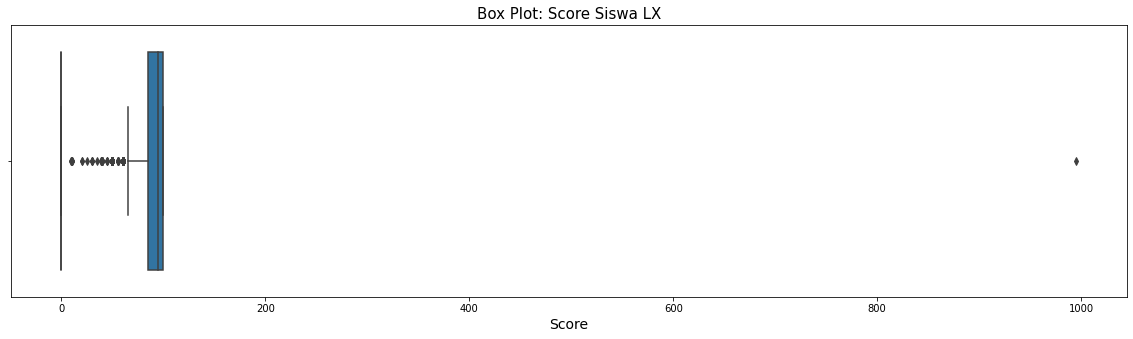

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(20,5))
sns.boxplot(x=lx_out['score'])
sns.boxplot(x=validscore['score'])
plt.title('Box Plot: Score Siswa LX', fontsize=15)
plt.xlabel('Score', fontsize=14)
plt.show()

`Selanjutnya, kita akan menampilkan boxplot untuk validscore (data yang valid). Caranya sama seperti tadi yaitu memanggil function boxplot dan set nilai x nya sebagai validscore . Sehingga disini kita bisa melihat gambaran dari data yang sudah bersih dari outlier seperti dibawah ini.`

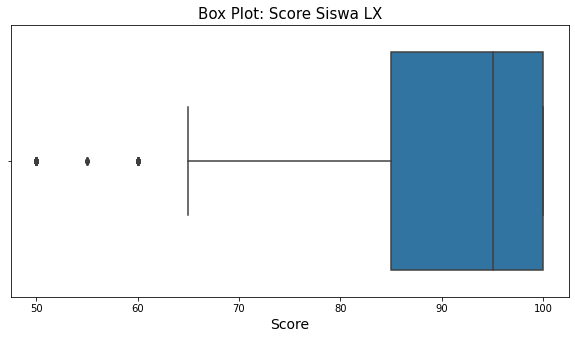

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,5))
sns.boxplot(x=validscore['score'])
plt.title('Box Plot: Score Siswa LX', fontsize=15)
plt.xlabel('Score', fontsize=14)
plt.show()

Correlation

`Selanjutnya saya mencari korelasi diantara score dengan course_title dan assignment_title. Tujuannya adalah untuk melihat mana yang lebih berpengaruh terhadap score dari siswa, apakah course nya atau karena assignmentnya. Namun, karena tipe data dari course_title dan assignment_title itu adalah object yang dimana tidak bisa dibuat sebagai korelasi, maka dari itu saya mengubahnya menjadi tipe data category. Karena korelasi hanya bisa bejerja dengan tipe data numerik. Dengan menggunakan category, data string kita direpresetasikan dalam bentuk integer array. Lalu setelah itu saya akan mencari matrix nya dengan menggunakan function corr yang sudah disediakan oleh pandas. Agar korelasinya terlihat, maka matrix tersebut direpresentasikan didalam suatu heatmap dengan menggunakan function heatmap. Dibawah ini saya bisa melihat bahwa score itu lebih terpengaruhi oleh course_title daripada assignment_title sebab memiliki nilai korelasi 0.25. Sehingga bisa kita katakan bahwa kebanyakan siswa mendapatkan score sesuai dengan course, namun belum tentu apakah siswa mengerjakan semua assignment didalam course tersebut.`

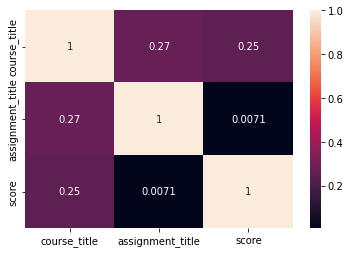

In [ ]:
lxpandas['course_title']=lxpandas['course_title'].astype('category').cat.codes
lxpandas['assignment_title']=lxpandas['assignment_title'].astype('category').cat.codes
corrmatrix = lxpandas.corr()
sns.heatmap(corrmatrix, annot=True)
plt.show()

Data Exploration

`Selanjutnya saya akan melakukan data exploration. Namun disini saya menggunakan spark, sebab spark memiliki function sql yang sangat berguna ketika kita akan melakukan eksplorasi terhadap dataset yang dimiki. Disini saya beri nama dataframe nya adalah lxspark. Lalu digunakan method createDataFrame yang sudah disediakan oleh spark untuk membuat data frame spark, dan disini pastinya saya menggunakan data dari validscore, sebab datanya sudah bersih, tidak ada missing value maupun outlier. `

In [ ]:
lxspark = spark.createDataFrame(validscore)

`Lalu saya juga akan melihat jumlah baris dan kolom dari lxspark dengan menggunakan method count() untuk menghitung jumlah baris, dan method len() untuk menghitung jumlah kolom dari columns. Disini bisa dilihat bahwa jumlah baris datanya adalah 30954 dan jumlah kolomnya adalah 7. `

In [ ]:
print((lxspark.count(),len(lxspark.columns)))

(30954, 7)


`Selanjutnya saya akan menampilkan list dari kolom yang ada di lxspark dengan menggunakan method columns. Dari sinilah tadi kita mendapatkan jumlah dari kolom tadi dengan cara mengukur panjangnya menggunakan len. Namun kita hanya bisa melihat nama-nama dari kolom dataset kita. `

In [ ]:
lxspark.columns

['learners_name',
 'institute_name',
 'course_title',
 'assignment_title',
 'score',
 'status',
 'submission_date']

`Karena informasi yang didapatkan hanya nama kolom saja. Kita bisa mendapatkan info lebih lanjut dari dataset kita dengan mengggunakan method printSchema(). Kita bisa melihat skema dari dataset, disini terdapat list dari nama kolom beserta tipe datanya. Lalu ada informasi tambahan yaitu nullable yang memperlihatkan apakah kolomnya bisa null atau tidak dengan value boolean.`

In [ ]:
lxspark.printSchema()

root
 |-- learners_name: string (nullable = true)
 |-- institute_name: string (nullable = true)
 |-- course_title: string (nullable = true)
 |-- assignment_title: string (nullable = true)
 |-- score: double (nullable = true)
 |-- status: string (nullable = true)
 |-- submission_date: timestamp (nullable = true)



`Disini karena saya akan melakukan eksplorasi data, biasanya menggunakan fungsi fungsi aggregate untuk bisa mendapatkan summary dari data. Sehingga disini saya mengimport semua function dari library pyspark.sql.functions. Disini ada variabel yang bernama lx_exp yang akan menampung semua proses aggregate. Namun, disini saya mengelompokkannya berdasarkan course_title. Fungsi agregate yang digunakan pertama adalah count, yang saya gunakan untuk menghitung jumlah assignment yang terkumpul dengan menghitung jumlah score yang ada. Lalu function kedua adalah max untuk mendapatkan nilai tertinggi dari score, lalu function min digunakan untuk mendapatkan nilai terendah dari score. Setelah itu function mean yang digunakan untuk mendapatkan rata-rata dari score untuk setiap course. Dan terakhir saya juga menghitung jumlah assignment dari masing-masing course dengan menggunakan countDistinct agar tidak ada duplikasi data. Dan terakhir, agar tampilan tabelnya bagus maka saya konversikan lagi ke pandas dengan menggunakan method toPandas().`

In [ ]:
from pyspark.sql.functions import *
lx_exp = lxspark.groupBy("course_title").agg(
    count("score").alias("jumlah_assignment_terkumpul"),
    max("score").alias("nilai_tertinggi"),
    min("score").alias("nilai_terendah"),
    mean("score").alias("nilai_rata"),
    countDistinct("assignment_title").alias("jenis_assignment")
).toPandas()

`Lalu saya akan melihat hasilnya dengan memanggil variabel lx_exp tadi. Disini kita bisa melihat bahwa ada 8 jenis course. Lalu kita bisa melihat summary yang sudah kita buat menggunakan fungsi fungsi agregat.`

In [ ]:
lx_exp

course_title  jumlah_assignment_terkumpul  \
0          WR302: Web Development Intermediate                         2738   
1                 WR102: Web Development Basic                          694   
2                 WR201: Web Development Basic                         2454   
3          WR202: Web Development Intermediate                           82   
4  Essential Programming Course - 1st Semester                          815   
5                WR303: Build Your Own Website                           94   
6              WR101: Basic Coding & Knowledge                        24069   
7  Essential Programming Course - 2nd Semester                            8   

   nilai_tertinggi  nilai_terendah  nilai_rata  jenis_assignment  
0            100.0            50.0   91.841855                21  
1            100.0            50.0   98.469741                11  
2            100.0            50.0   95.397718                15  
3            100.0            50.0   98.048780                 4  
4            100.0            65.0   99.325153                15  
5            100.0            70.0   99.148936                 7  
6            100.0            50.0   90.893971                31  
7            100.0           100.0  100.000000                 1

`Agar lebih mudah untuk melihat datanya satu persatu, maka disini saya urutkan datanya dari yang terbesar ke terkecil untuk jumlah assignment yang terkumpul. Disini bisa dilihat bahwa siswa paling banyak mengerjakan course basic coding dan knowledge. Dan course yang paling sedikit dikerjakan adalah essential programming semester 2. `

In [ ]:
jmlas = lx_exp.sort_values(by=['jumlah_assignment_terkumpul'], ascending=False).head(100)
jmlas

course_title  jumlah_assignment_terkumpul  \
6              WR101: Basic Coding & Knowledge                        24069   
0          WR302: Web Development Intermediate                         2738   
2                 WR201: Web Development Basic                         2454   
4  Essential Programming Course - 1st Semester                          815   
1                 WR102: Web Development Basic                          694   
5                WR303: Build Your Own Website                           94   
3          WR202: Web Development Intermediate                           82   
7  Essential Programming Course - 2nd Semester                            8   

   nilai_tertinggi  nilai_terendah  nilai_rata  jenis_assignment  
6            100.0            50.0   90.893971                31  
0            100.0            50.0   91.841855                21  
2            100.0            50.0   95.397718                15  
4            100.0            65.0   99.325153                15  
1            100.0            50.0   98.469741                11  
5            100.0            70.0   99.148936                 7  
3            100.0            50.0   98.048780                 4  
7            100.0           100.0  100.000000                 1

`Lalu saya mengurutkan nilai terendah dengan menggunakan method sort_values. Untuk nilai tertinggi tidak perlu dilakukan pengurutan sebab siswa mampu untuk mencapai nilai 100 dalam setiap course, sehingga nilai tertingginya adalah 100 untuk masing-masing course. Lalu disini kita bisa melihat bahwa essential programming yang hanya 8 orang membuat tugas ternyata memiliki skor 100 semua. Lalu kita juga bisa melihat nilai paling rendah adalah pada course basic_coding.`

In [ ]:
minscore = lx_exp.sort_values(by=['nilai_terendah'], ascending=False).head(10)
minscore

course_title  jumlah_assignment_terkumpul  \
7  Essential Programming Course - 2nd Semester                            8   
5                WR303: Build Your Own Website                           94   
4  Essential Programming Course - 1st Semester                          815   
0          WR302: Web Development Intermediate                         2738   
1                 WR102: Web Development Basic                          694   
2                 WR201: Web Development Basic                         2454   
3          WR202: Web Development Intermediate                           82   
6              WR101: Basic Coding & Knowledge                        24069   

   nilai_tertinggi  nilai_terendah  nilai_rata  jenis_assignment  
7            100.0           100.0  100.000000                 1  
5            100.0            70.0   99.148936                 7  
4            100.0            65.0   99.325153                15  
0            100.0            50.0   91.841855                21  
1            100.0            50.0   98.469741                11  
2            100.0            50.0   95.397718                15  
3            100.0            50.0   98.048780                 4  
6            100.0            50.0   90.893971                31

`Lalu disini saya akan mengurutkan nilai rata-rata dari course secara descending. Bisa dilihat bahwa course yang memiliki nilai rata-rata tertinggi adalah essential programming. sedangkan course yang memiliki nilai rata-rata paling rendah adalah basic coding `

In [ ]:
meanscore = lx_exp.sort_values(by=['nilai_rata'], ascending=False).head(10)
meanscore

course_title  jumlah_assignment_terkumpul  \
7  Essential Programming Course - 2nd Semester                            8   
4  Essential Programming Course - 1st Semester                          815   
5                WR303: Build Your Own Website                           94   
1                 WR102: Web Development Basic                          694   
3          WR202: Web Development Intermediate                           82   
2                 WR201: Web Development Basic                         2454   
0          WR302: Web Development Intermediate                         2738   
6              WR101: Basic Coding & Knowledge                        24069   

   nilai_tertinggi  nilai_terendah  nilai_rata  jenis_assignment  
7            100.0           100.0  100.000000                 1  
4            100.0            65.0   99.325153                15  
5            100.0            70.0   99.148936                 7  
1            100.0            50.0   98.469741                11  
3            100.0            50.0   98.048780                 4  
2            100.0            50.0   95.397718                15  
0            100.0            50.0   91.841855                21  
6            100.0            50.0   90.893971                31

`Selain itu disini saya juga akan menghitung jumlah siswa dari masing-masing sekolah dengan menggunakan function groupBy. Lalu menggunakan method countDistinct untuk learners_name, sebab kemungkinan duplikasi sangat tinggi karena siswa tidak hanya sekali dalam mengumpulkan tugas. Lalu setelah itu saya urutkan dengan menggunakan function orderBy karena kita akan mengurutkannya berdasarkan object. Lalu diurutkan secara descending. Setelah itu diubah ke pandas agar tampilannya lebih bagus dengan menggunakan function toPandas dan menampilkan 5 data pertama sebagai sampelnya`

In [ ]:
lxmurid = lxspark.groupBy("institute_name").agg(countDistinct("learners_name").alias("jumlah_murid"))
lxmuridvis = lxmurid.orderBy(['jumlah_murid'], ascending= [False])
lxmuridvis = lxmuridvis.toPandas().head(10)
lxmuridvis

institute_name  jumlah_murid
0  SMK Angkasa Husein Sastranegara Bandung            95
1             SMK Muhammadiyah 2 Pekanbaru            85
2                       SMK Negeri 7 Batam            76
3                        SMK Bhakti Insani            48
4                 Politeknik Negeri Manado            40
5                  SMK Hang Tuah 1 Jakarta            37
6                     SMK Negeri 1 Siantar            36
7                   SMK Negeri 1 Air Putih            36
8                SMKS Sandhy Putra 2 Medan            35
9           SMK Muhammadiyah 7 Gondanglegi            35

`Sebab SMK Angkasa Husein memiliki murid paling banyak dan jumlah assignmentnya juga banyak yang dikumpulkan sehingga berbanding lurus. Namun disini ada SMK Negeri 1 siantar yang muridnya hanya 36 namun jumlah assignment yang dikumpulkan mencapai 1064 yang dimana lebih banyak daripada smk muhammadiyah 2 pekanbaru yang muridnya berbeda sangat jauh yaitu 85 orang.`

In [ ]:
lxmurida = lxspark.groupBy("institute_name").agg(count("score").alias("jumlah_assignment"))
lxmurida = lxmurida.orderBy(['jumlah_assignment'], ascending= [False])
lxmurida = lxmurida.toPandas().head(10)
lxmurida

institute_name  jumlah_assignment
0  SMK Angkasa Husein Sastranegara Bandung               1793
1                       SMK Negeri 7 Batam               1236
2                     SMK Negeri 1 Siantar               1064
3             SMK Muhammadiyah 2 Pekanbaru               1002
4                   SMK Negeri 1 Air Putih                987
5              SMK Muhammadiyah 2 Muntilan                915
6               SMK Muhammadiyah 1 Pandaan                873
7                    SMK Negeri 2 Pengasih                822
8                 SMK YPK Kesatuan Jakarta                809
9                     SMK Negeri 4 Bandung                806

`Disini saya akan menghitung jumlah assignment dari masing-masing score yang ada. Untuk melihat persebaran nilai yang didapatkan oleh siswa. Untuk menghitung jumlah menggunakan function score. Lalu setelah itu saya urutkan berdasarkan jumlah_assignment yang paling banyak. Dan terakhir dikonversikan ke pandas agar tampilannya lebih bagus dan data yang ditampilkan hanya berjumlah 10 saja. Disini bisa dilihat bahwa nilai 100 yang paling banyak didapatkan oleh siswa. Kita bisa melihat bahwa mayoritas siswa mendapatkan nilai yang tinggi, bisa dilihat dari 4 data teratas, nilainya berada di range 80 - 100. Ini bisa digunakan untuk evaluasi dari pekerjaan mentor nantinya`

In [ ]:
lxn = lxspark.groupBy("score").agg(count("score").alias("jumlah_assignment"))
lxnvis = lxn.orderBy(['jumlah_assignment'], ascending= [False])
lxnvis = lxnvis.toPandas().head()
lxnvis

score  jumlah_assignment
0  100.0              13411
1   90.0               5739
2   80.0               4435
3   95.0               2732
4   85.0               2190

`Selanjutnya saya menghitung jumlah_assignment yang masuk berdasarkan tanggal. Dimulai dari menggunakan groupby untuk mengelompokkannya berdasarkan submission_date, lalu menghitung jumlah assignment yang beracu kepada score (sebab score merepresentasikan assignment). Lalu setelah itu akan diurutkan berdasarkan jumlah assignmentnya secara descending. Dan terakhir dikonversikan ke pandas dengan menggunakan method toPandas dan menampilkan 5 data teratas dengan head().`

In [ ]:
lxd = lxspark.groupBy("submission_date").agg(count("score").alias("jml_assignment"))
lxdvis = lxd.orderBy(['jml_assignment'], ascending= [False])
lxdvis = lxdvis.toPandas().head()
lxdvis

submission_date  jml_assignment
0      2023-01-13             552
1      2023-01-11             505
2      2023-01-12             475
3      2023-01-14             443
4      2023-01-16             434

#Visualisasi
`Disini saya melakukan visualisasi untuk summary data jumlah assignment terkumpul, nilai terendah dan nilai rata-rata dari masing-masing course. Untuk jenis chart yang saya gunakan adalah bar dengan menggunakan method bar yang sudah disediakan oleh pyspark. Disini saya memvisualisasikan data yang sudah diurutkan sebelumnya dengan memanggil variabel-variabel yang menampung data berurut tadi. Daripada kita membaca tabel, lebih baik kita visualisasikan agar lebih cepat dipahami, untuk menampilkan chart yang sudah dibuat kita menggunakan method show(). Disini saya bisa bandingkan antara jumlah assignment, nilai terendah dan nilai tertinggi sebab menurut saya mereka memiliki hubungan yang cukup signifikan. Jadi dari visualisasi ini bisa dilihat bahwa course yang paling banyak dikerjakan oleh siswa adalah course basic coding & knowledge. Dan perbedaan kuantitasnya juga sangat jauh dengan course course lain yang mana hampir mendekati 25000. Mungkin ini dikarenakan course yang paling dasar. Lalu bisa kita simpulkan bahwa course course setelah course ini hanya sedikit dikerjakan oleh siswa. Mungkin siswa mengalami penurunan minat dalam mempelajari course sehingga semakin tinggi tingkatan course nya, semakin sedikit peminatnya. Mungkin ini bisa menjadi bahan pertimbangan dan evaluasi dari pihak perusahaan. Lalu setelah itu pada bar chart yang kedua berbanding terbalik dengan bar chart pertama. Yang dimana nilai terendah itu ada pada basic coding & knowledge sedangkan nilai tertinggi berada pada essential programming. Namun essential programming ini memiliki jumlah assignment yang paling sedikit dikerjakan. Bisa disimpulkan bahwa ketika siswa sudah sampai di tingkat ini, setelah melalui beberapa course, pemahamannya menjadi lebih bagus sehingga range nilainya hanya berada pada 100. Dan terakhir kita juga bisa lihat bahwa essential programming rata-ratanya 100, yang berarti semua siswa mendapat nilai 100, sehingga terbukti efisien jika mengikuti dari course dasar hingga tingkat atas. Lalu untuk nilai rata-rata terendah berada pada basic coding, sebab ini hal yang paling dasar dimana siswa baru mengenal coding pada masa ini, sehingga pemahamannya belum sempurna.`

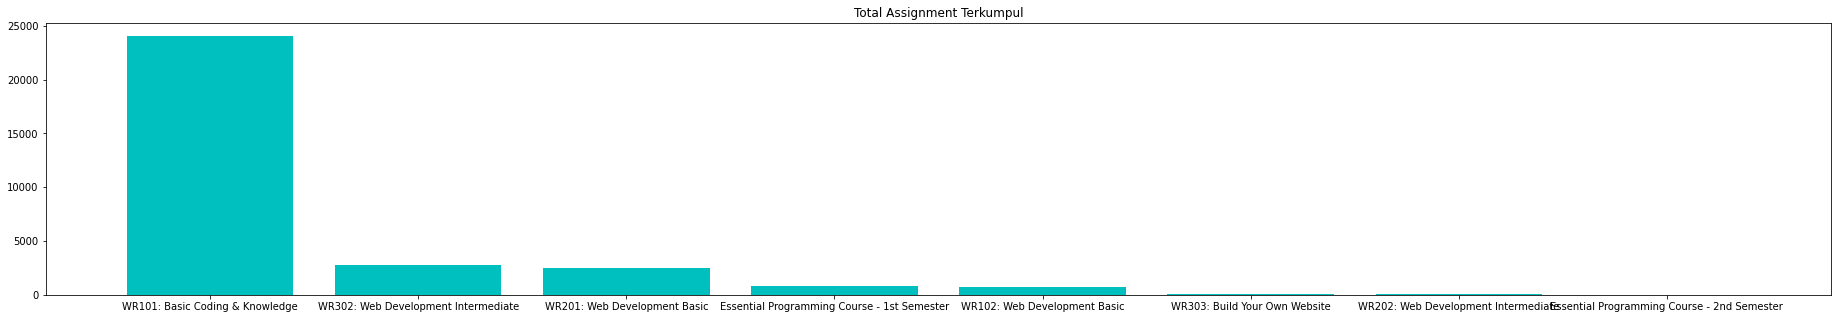

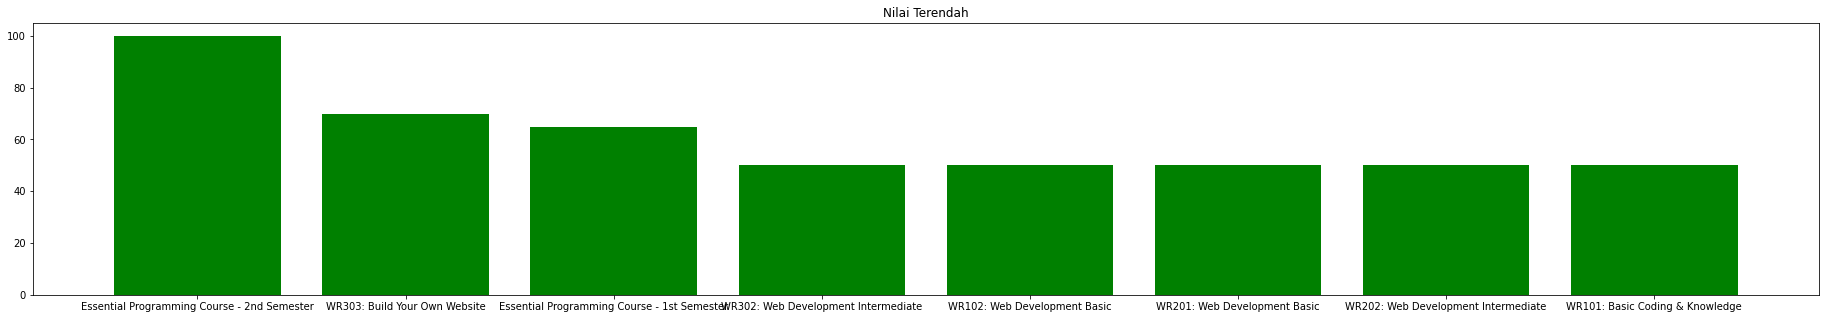

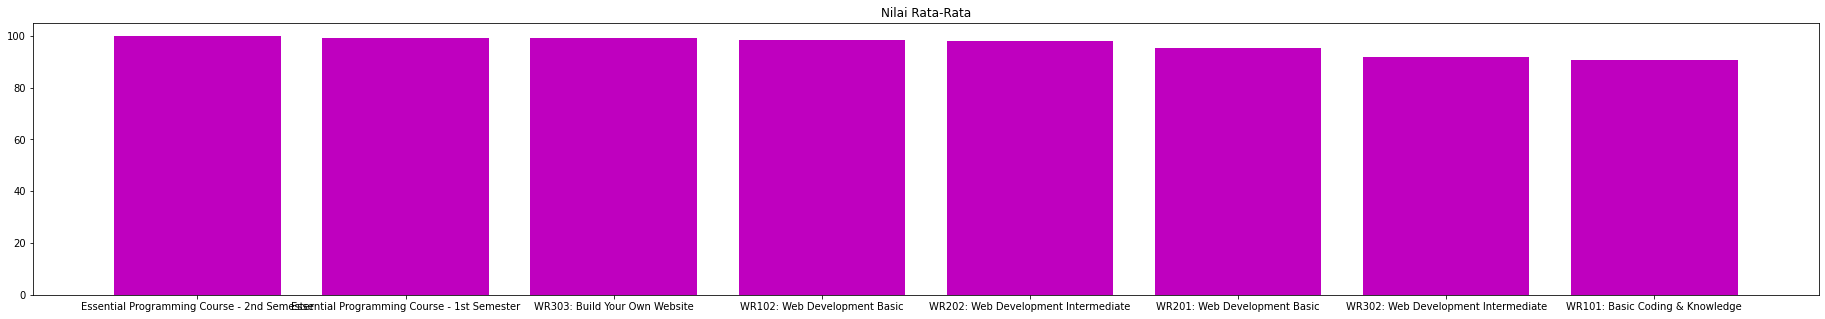

In [ ]:
data1 = jmlas
data2 = minscore
data3 = meanscore
df1 = data1
df2 = data2
df3 = data3
c1 = ['c']
c2 = ['g']
c3 = ['m']
fig1, ax1 = plt.subplots(figsize=(32,5))
fig2, ax2 = plt.subplots(figsize=(32,5))
fig3, ax3 = plt.subplots(figsize=(32,5))
ax1.set_title('Total Assignment Terkumpul')
ax2.set_title('Nilai Terendah')
ax3.set_title('Nilai Rata-Rata')
ax1.bar(np.arange(len(df1)), df1['jumlah_assignment_terkumpul'], color=c1)
ax2.bar(np.arange(len(df2)), df2['nilai_terendah'], color=c2)
ax3.bar(np.arange(len(df3)), df3['nilai_rata'], color=c3)
ax1.set_xticks(np.arange(len(df1)))
ax2.set_xticks(np.arange(len(df2)))
ax3.set_xticks(np.arange(len(df3)))
ax1.set_xticklabels(df1['course_title'])
ax2.set_xticklabels(df2['course_title'])
ax3.set_xticklabels(df3['course_title'])
plt.show()

`Disini saya memvisualisasikan jumlah murid dari setiap sekolah dengan menggunakan plot barh disini function barh sudah disediakan oleh library pandas. Disini bisa dilihat dengan jelas bahwa SMK Angkasa Husein memiliki murid yang paling banyak mengikuti learning x ini.`

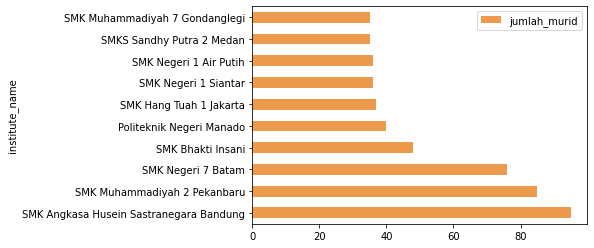

In [ ]:
lxmuridvis.plot.barh(x="institute_name", y=["jumlah_murid"], color="#EE9A4D")
plt.show()

`Disini saya melakukan visualisasi terhadap jumlah assignment yang mendapatkan score sesuai dengan yang ada dengan menggunakan plot area, area ini sama seperti plot line, namun bedanya memiliki isi atau fill. Untuk data, Disini kebanyakan siswa mendapatkan nilai 100, hampir setengah dari jumlah dataset kita`

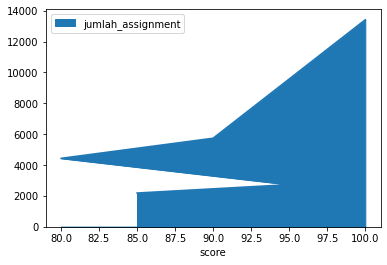

In [ ]:
lxnvis.plot.area(x="score", y=["jumlah_assignment"])
plt.show()

`Disini saya memvisualisasikan datanya dengan menggunakan plot line, disini bisa dilihat terjadi kenaikan jumlah assignment yang cukup signifikan pada 13-01-2023, dan mengalami penurunan drastis setelah hari itu yaitu tanggal 14-01-2023. Setelah diteliti lagi, ternyata hari tersebut adala hari dealine dari tugas yang sudah diberikan minggu lalu. Jadi bisa disimpulkan bahwa jika terjadi kenaikan dari jumlah data assignment, maka hari itu adalah deadline dari tugas yang diberikan.`

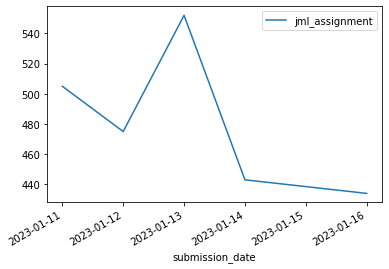

In [ ]:
lxdvis.plot.line(x="submission_date", y=["jml_assignment"])
plt.show()